1. Framing the problem statement
Find out whether or not a student will get placed in a company on the basis of input column

2. Data Collection
Data has been collected from a github profile. 

3. Data pre-processing
The data has been cleaned and pre-processed. It is free of outliers and missing values.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("placement_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


# Steps

1. Preprocess + EDA + Feature Selection
2. Extract input and output cols
3. Scale the values
4. Train test split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


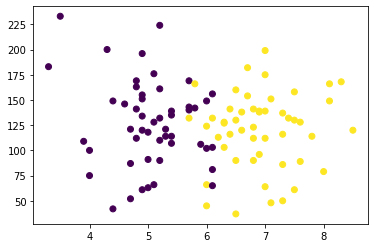

In [7]:
plt.scatter(df['cgpa'],df['iq'],c= df['placement'])

In [8]:
#separating the input and output columns

x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
#Train_test_splitting

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [10]:
x_train


,cgpa,iq
40,4.9,134
93,6.8,112
56,6.1,65
9,5.1,66
76,4.9,155
...,...,...
12,5.4,139
28,5.2,90
20,6.6,120
96,4.4,42


In [11]:
x_test

,cgpa,iq
41,5.4,114
80,4.9,196
59,4.8,112
5,7.1,48
0,6.8,123
7,5.0,63
51,4.8,141
99,6.2,113
52,7.0,175
11,6.9,138


In [12]:
y_train.shape


(90,)

In [13]:
y_test.shape

(10,)

In [14]:
#Preprocessing -- Standarization of values

from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [17]:
x_train

array([[-9.53204789e-01,  2.60741942e-01],
       [ 6.89920402e-01, -2.97386755e-01],
       [ 8.45584894e-02, -1.48975261e+00],
       [-7.80244243e-01, -1.46438312e+00],
       [-9.53204789e-01,  7.93501153e-01],
       [ 8.45584894e-02, -1.08384083e+00],
       [ 6.03440129e-01,  1.47847728e+00],
       [ 8.62880949e-01, -2.97386755e-01],
       [-1.92178385e-03, -1.99714233e+00],
       [-6.93763970e-01, -3.48125728e-01],
       [ 5.16959856e-01,  3.62219887e-01],
       [ 1.20880204e+00,  2.10002969e-01],
       [ 8.45584894e-02,  2.10002969e-01],
       [-1.92178385e-03, -1.46438312e+00],
       [-1.38560616e+00,  6.41284235e-01],
       [-9.53204789e-01, -1.59123055e+00],
       [ 6.03440129e-01,  7.68131666e-01],
       [-1.12616534e+00, -1.81955593e+00],
       [ 2.57519036e-01,  8.31555382e-02],
       [-6.93763970e-01,  2.10002969e-01],
       [-2.61362604e-01,  4.89067318e-01],
       [ 8.62880949e-01,  3.87589373e-01],
       [-2.61362604e-01,  1.14867396e+00],
       [ 4.

In [18]:
#Model training
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred = clf.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [23]:
y_test

41    0
80    0
59    0
5     1
0     1
7     0
51    0
99    1
52    1
11    1
Name: placement, dtype: int64

In [24]:
#Evaluation of model

from sklearn.metrics import accuracy_score


In [25]:
accuracy_score(y_test,y_pred)

1.0

<AxesSubplot:>

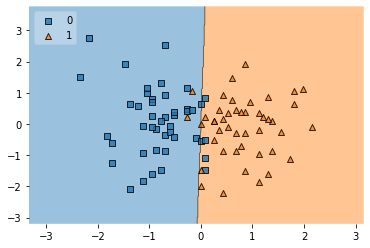

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [27]:
#Deployment of model
import pickle

In [28]:
pickle.dump(clf,open('model.pkl','wb'))